In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
from Dipper_Project_Functions import plotparams
from Dipper_Project_Functions import read_lightcurve_csv
from Dipper_Project_Functions import read_lightcurve_dat
from Dipper_Project_Functions import custom_id
import scipy
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.table import Table

In [2]:
asassn_id = 231928300104

In [3]:
dfv, dfg = read_lightcurve_dat(asassn_id, 'Research/Updated_LC_data/')

dfg['Mag'] = [float(i) for i in dfg['Mag']]

dfg['JD'] = [float(i) for i in dfg['JD']]

mag = dfg['Mag']

jd = dfg['JD']

meanmag = sum(mag) / len(mag)

dfg_mag_avg = [i - meanmag for i in mag]

peaks = scipy.signal.find_peaks(dfg_mag_avg, prominence=0.17, distance=25, height=0.3, width=2) 

peak = peaks[0]

prop = peaks[1]

length = len(peak)

peak = [int(i) for i in peak]

peak = pd.Series(peak)

print(len(dfg))
print(peak)

1993
0     921
1    1679
2    1918
dtype: int64


['bG' 'bH' 'bk' 'bl' 'bo' 'bp']
Number of peaks: 3


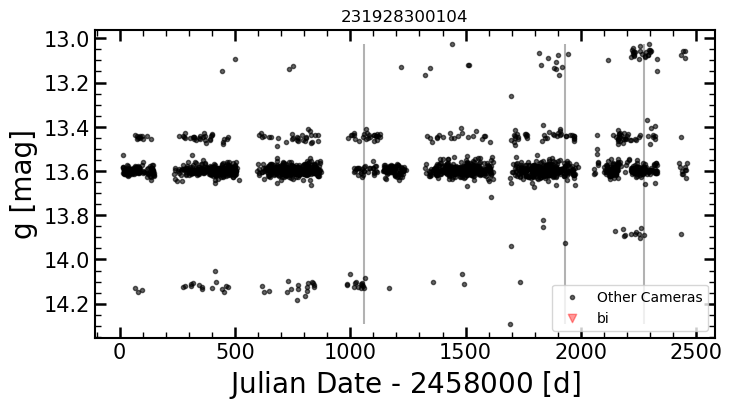

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)
ax.set_title(asassn_id)

cams = dfg["Camera"]
camtype = np.unique(cams)

for i in range(length):
    ax.vlines((dfg.JD[peak[i]] - (2.458 * 10**6)), min(dfg.Mag), max(dfg.Mag), "k", alpha=0.3)

df_bi = dfg.loc[dfg.Camera == 'bi'].reset_index(drop=True)
dfg = dfg.loc[dfg.Camera != 'bi'].reset_index(drop=True)

print(camtype)

print('Number of peaks:', length)

ax.scatter((dfg.JD - (2.458 * 10 **6)), dfg.Mag, color = 'k', marker = '.', label='Other Cameras', alpha = 0.6)
ax.scatter((df_bi.JD - (2.458 * 10 **6)), df_bi.Mag, color = 'r', marker = 'v', label='bi', alpha = 0.4)

ax.invert_yaxis() 
ax.set_xlabel('Julian Date - $2458000$ [d]', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
ax.legend()
plt.show() 